In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
dataset_path = '/content/drive/My Drive/ML Datasets/Flowers'
print(os.listdir(dataset_path))

['dandelion', 'tulip', 'sunflower', 'rose', 'daisy']


In [4]:
count = 0

# List all subdirectories in the main folder
dirs = os.listdir(dataset_path)

for dir in dirs:
    dir_path = os.path.join(dataset_path, dir)  # ✅ Correctly join folder path

    if os.path.isdir(dir_path):  # ✅ Ensure it's a directory
        files = os.listdir(dir_path)  # ✅ List files inside the subfolder
        print(f"{dir} Folder has {len(files)} Images")
        count += len(files)

print(f"Images Folder has {count} Images")

dandelion Folder has 639 Images
tulip Folder has 984 Images
sunflower Folder has 753 Images
rose Folder has 784 Images
daisy Folder has 764 Images
Images Folder has 3924 Images


In [5]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
# Training and validation data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3143 images belonging to 5 classes.
Found 781 images belonging to 5 classes.


In [8]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    #Conv2D(64, (3, 3), activation='relu'),
    #MaxPooling2D(2, 2),

    #Conv2D(128, (3, 3), activation='relu'),
    #MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 output classes
])

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
# Train
history = model.fit(train_data,
                    epochs=15, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 1444s 15s/step - accuracy: 0.2990 - loss: 4.7603 - val_accuracy: 0.4264 - val_loss: 1.2811
Epoch 2/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 35s 353ms/step - accuracy: 0.4094 - loss: 1.3141 - val_accuracy: 0.5006 - val_loss: 1.1850
Epoch 3/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.4550 - loss: 1.2731 - val_accuracy: 0.5262 - val_loss: 1.1666
Epoch 4/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.5007 - loss: 1.1978 - val_accuracy: 0.5493 - val_loss: 1.1000
Epoch 5/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 37s 372ms/step - accuracy: 0.5033 - loss: 1.1861 - val_accuracy: 0.5659 - val_loss: 1.1007
Epoch 6/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 376ms/step - accuracy: 0.5068 - loss: 1.1538 - val_accuracy: 0.5544 - val_loss: 1.0905
Epoch 7/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 39s 361ms/step - accuracy: 0.5350 - loss: 1.1152 - val_accuracy: 0.5672 - val_loss: 1.0845
Epoch 8/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 34s 348ms/step - accuracy: 0.5535 - loss: 1.0797 - val_accu

In [12]:
# Evaluate
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - accuracy: 0.6105 - loss: 0.9845
Validation Loss: 0.9478
Validation Accuracy: 0.6338


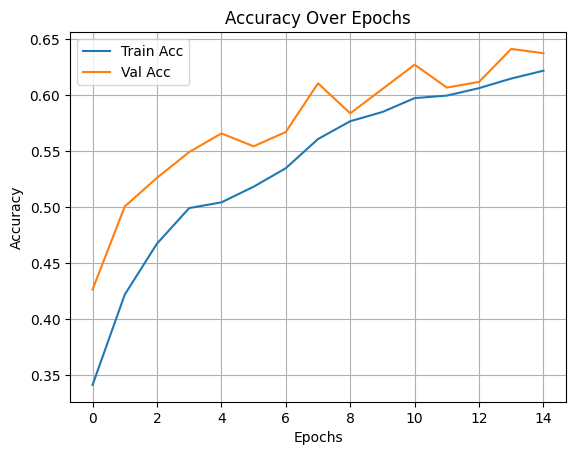

In [13]:
# Plot training history
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
